# Statistical Modeling Demo

(Notebook Credit Jeremy Eng)

## Introduction
In this notebook, we will demo how to create linear and logistic regression models using the [statsmodels package](https://www.statsmodels.org/stable/index.html), and we will also cover how to interpret the output.

### Outline
1. Statsmodels installation
2. Loading the datatset
3. Simple Linear Regression
4. Multiple Linear Regression
5. Logistic Regression

## Statsmodels Installation
Make sure the statsmodels package is installed if it isn't already. Like most packages, it can be installed:
- using pip: `pip install statsmodels`
- or conda: `conda install -c conda-forge statsmodels`

In [22]:
!pip install statsmodels

## Load and view the dataset

We will work with "Duncan's Occupation Prestige Data". We can view its documentation [here](https://rdrr.io/cran/carData/man/Duncan.html). We can load it using statsmodels's `get_rdatasets` method. Notice it has one categorical variable and three numerical variables.

In [23]:
import statsmodels.api as sm
import pandas as pd

duncan_data = sm.datasets.get_rdataset("Duncan", "carData")
df = duncan_data.data
df

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


Let's use seaborn's `pairplot` to informally check if there is linearity between the numerical variables.

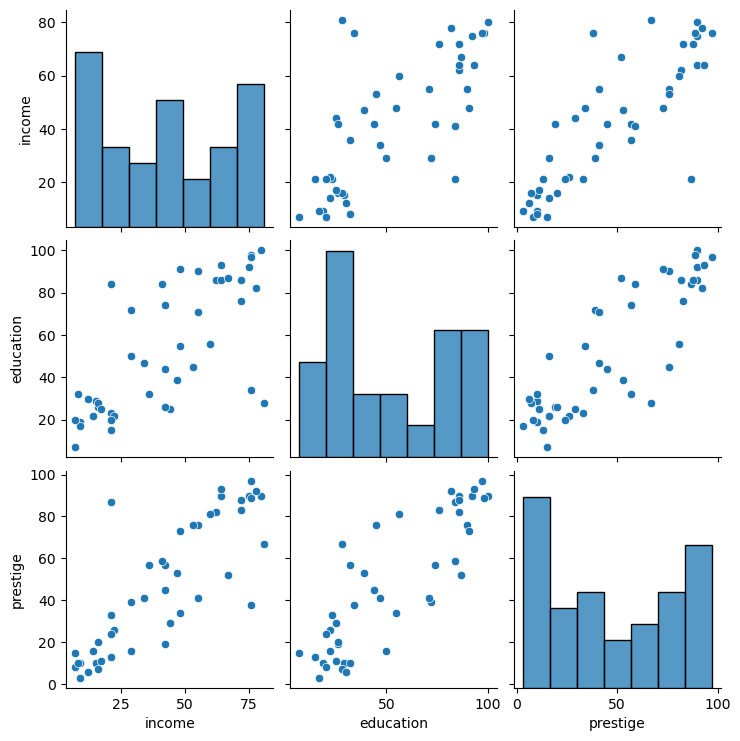

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=df)
plt.show()

It seems like all three numerical variables are positively correlated with one another. Let's check this by looking at the correlations.

In [25]:
df.corr()

/var/folders/q8/mbpwcdsj0ngfw0vpfscwqg4h0000gn/T/ipykernel_19164/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,income,education,prestige
income,1.000000,0.724512,0.837801
education,0.724512,1.000000,0.851916
prestige,0.837801,0.851916,1.000000


We can formally check if the correlations are significant by using Pearson's correlation coefficient test.

In [26]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['income'], df['education'])
stat, p2 = scipy.stats.pearsonr(df['income'], df['prestige'])
stat, p3 = scipy.stats.pearsonr(df['education'], df['prestige'])
print(p1, p2, p3)

1.83994641852091e-08 7.144355594290168e-13 1.1708786264586817e-13


All p-values are <0.05, so we can conclude we have significant correlation.
___

For this example, let's treat **prestige** as our **dependent variable**, and income and education will be our independent variables.

>Do you see a problem with any of the linear regression assumptions yet?
>- Linearity
>- Independence
>- Homoscedasticity
>- Normality
>- Multicollinearity (for Multivariant Linear Regression)

We can check our assumptions later after we fit a linear regression model by examining the residuals.

## Simple Linear Regression

Simple linear regression consists of one continuous dependent variable and one independent variable. Let's use **prestige** as our dependent variable ($y$) and **income** as our independent variable ($x$). Simple linear regression models use the relationship:

$$
y=mx+b
$$

> Note that if we want an intercept ($b$) in a statsmodels OLS model, we need to use the statsmodels's `add_constant` function, prior to fitting the model (as shown below).

In [27]:
y = df['prestige']
X = df['income']
X = sm.add_constant(X) # A hack that adds a column of 1's so the model will contain an intercept (bias)
X.head()

,const,income
accountant,1.0,62
pilot,1.0,72
architect,1.0,75
author,1.0,55
chemist,1.0,64


In [28]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           7.14e-13
Time:                        15:07:08   Log-Likelihood:                -191.38
No. Observations:                  45   AIC:                             386.8
Df Residuals:                      43   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4566      5.190      0.473      0.6

### Important output
- **R-squared**: the proportion of variance in the dependent variable that can be explained by the independent variable (goodness of fit). Ranges from 0 to 1.
- **Adj. R-squared**: Used when comparing models with a different number of indep. variables. Penalizes for using more variables.
- **Prob (F-statistic)**: P-value for hypothesis test:
    - H<sub>0</sub>: Independent variable(s) have no effect on the dependent variable.
    - H<sub>a</sub>: Independent variable(s) have an effect on the dependent variable.
- **coef**: The coefficient (slope) for each independent variable (and constant).
- **P>|t|**: P-value for the hypthesis test:
    - H<sub>0</sub>: Coefficient (slope) is zero (indep. variable does not have an effect on dep. variable)
    - H<sub>a</sub>: Coefficient (slope) is not zero (indep. variable has an effect on dep. variable).

### Residual plots

Many linear regression assumptions can be examined by looking at the residuals. We can extract information from the fit model by using attributes, such as `.resid`.

In [29]:
residuals = results.resid # The residual will have the same unit as dependent var (in this case they are in %ages)
residuals

accountant            12.559266
pilot                  2.755369
architect              6.514200
author                14.121993
chemist               18.398486
minister              61.855242
professor             21.398486
dentist                1.112251
reporter             -22.842683
engineer               7.755369
undertaker             9.167059
lawyer                 4.433810
physician             12.433810
welfare.worker        12.247449
teacher               18.684721
conductor            -46.566190
contractor            16.282773
factory.owner         13.720045
store.manager         -2.832941
banker                 5.273031
bookkeeper             5.212125
mail.carrier         -20.315279
insurance.agent      -20.878007
store.clerk          -17.787875
carpenter              7.855242
electrician           -0.234889
RR.engineer          -22.968138
machinist             15.649397
auto.repairman        -0.225147
plumber              -20.993720
gas.stn.attendant     -8.662420
coal.min

#### Normality
We can check the normalilty assumption by checking normality on the residuals. We can do this using either a histogram or QQ-plot (and more formally with a hypothesis test).

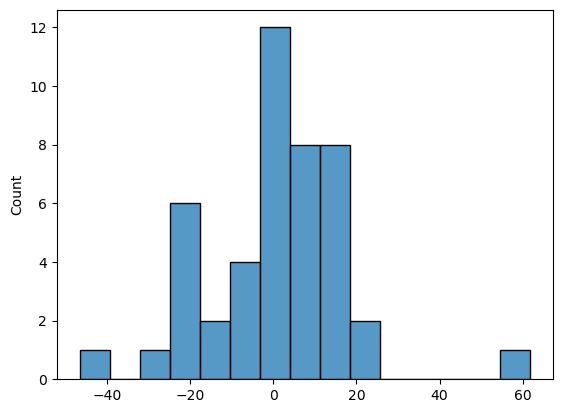

In [30]:

sns.histplot(residuals, bins= 15)
plt.show()

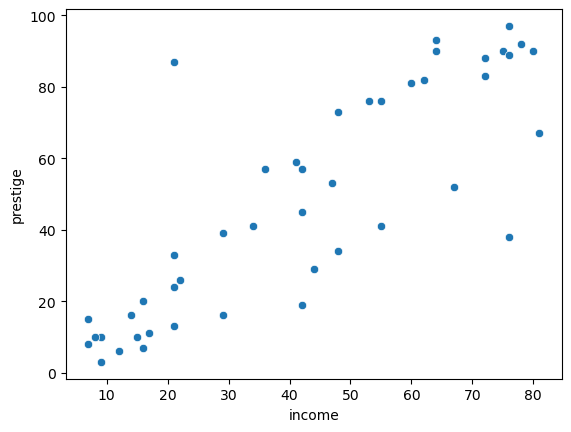

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='income', y='prestige')
plt.show()

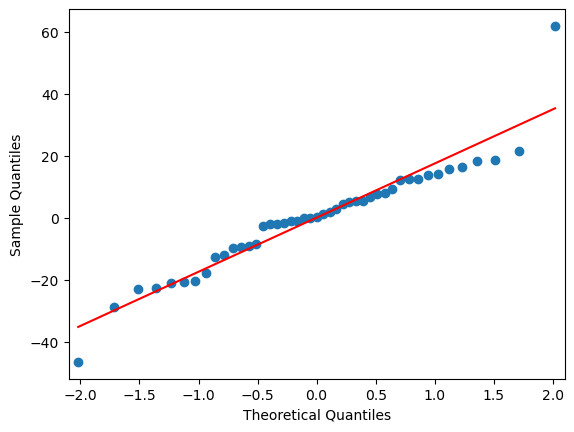

In [32]:
sm.qqplot(residuals, line="r")
plt.show()

In [33]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9350489974021912, pvalue=0.014202380552887917)

null hypotheis states that the data is drawn from a normal distribution. Does this pvalue indicates rejection of null hypothesis?

#### Homoscedasticity
For the homoscedasticity assumption to be satisfied, the variance of the residuals should not change as the indep. variable changes. We can view this visually by plotting the residuals vs the indep. variable (income).

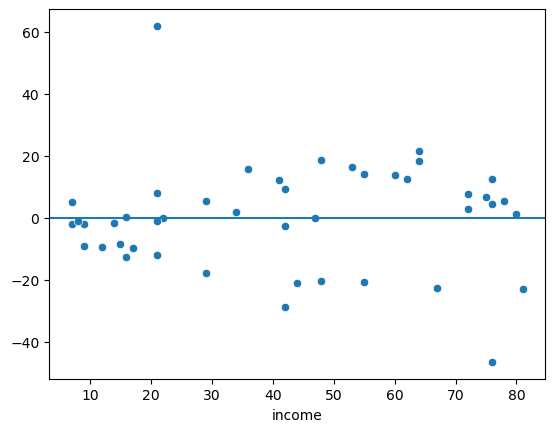

In [34]:
ax = sns.scatterplot(x=df['income'], y=residuals)
ax.axhline(0) #horizontal line at 0

We can also use the Breusch-Pagan test (among others) to formally test homoscedasticity.
- H<sub>0</sub>: Homoscedasticity is present (the residuals are distributed with equal variance)
- H<sub>a</sub>: Homoscedasticity is not present(the residuals are not distributed with equal variance)

In [35]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p,f_p) #actually performs two tests, so it returns two p-values

0.6018421465802188 0.6115645291127645


Homoscedasticity assumption is satisfied.

### Extracting coefficients for predictions
If we want to make predictions, we need to extract the coefficients from the model and use the equation:

$$
prestige = m \times (income) + b
$$

We can extract the coefficients from the `.params` attribute as follows. [See here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) for a full list of attributes and methods of a fit OLS model.

In [36]:
results.params

const     2.456574
income    1.080390
dtype: float64

So if we want to predict 'prestige' value for a job with an 'income' value of 50, we can use the equation above:

In [37]:
b = results.params['const']
m = results.params['income']

known_income = 50
predicted_prestige = m*known_income + b
predicted_prestige

56.47605827758998

#### Run linear regression using the log of the dep. variable
###### AKA Normalizing the varriable to prolly satisfy most assunptions

In [38]:
import numpy as np

y = np.log(df['prestige'])
X = df['income']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     93.50
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.37e-12
Time:                        15:07:09   Log-Likelihood:                -33.781
No. Observations:                  45   AIC:                             71.56
Df Residuals:                      43   BIC:                             75.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2316      0.156     14.269      0.0

In [39]:
residuals = results.resid
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9642308950424194, pvalue=0.17687135934829712)

Normality assumption is now satisfied. We should also check homoscedasticity again.

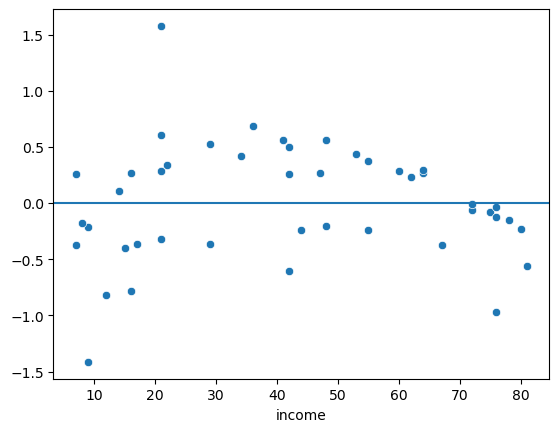

In [40]:
ax = sns.scatterplot(x=df['income'], y=residuals)
ax.axhline(0) #horizontal line at 0

In [41]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p,f_p)

0.08670784652605822 0.09045189617435644


Since we took the log of the prestige, we need to solve for prestige to get the proper prediction.
$$
\ln(prestige) = m \times (income) + b
$$
$$
prestige = e^{m \times (income) + b}
$$

In [42]:
b = results.params['const']
m = results.params['income']

known_income = 50
predicted_prestige = np.exp(m*known_income + b)
predicted_prestige

44.51617630386662

---
## Multivariate Linear Regression

multivariate iple linear regression consists of one continuous dependent variable and more than one independent variable. Let's use prestige as our dependent variable ($y$) and income and education as our independent variables ($x_1$ and $x_2$). This multiple linear regression model uses the relationship:

$$
y=b_0 + b_1x_1 + b_2x_2
$$

> Note that if we want an intercept ($b_0$) in a statsmodels OLS model, we need to use the statsmodels's `add_constant` function, prior to fitting the model (as shown below).

In [43]:
y = df['prestige']
X = df[['income', 'education']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,income,education
accountant,1.0,62,86
pilot,1.0,72,76
architect,1.0,75,92
author,1.0,55,90
chemist,1.0,64,86


In [44]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.65e-17
Time:                        15:07:09   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.1

### Residual Plots
#### Normality

In [45]:
residuals = results.resid
residuals

accountant             4.001512
pilot                  4.472523
architect              0.942982
author                 0.009306
chemist               10.804046
minister              34.641225
professor              9.983209
dentist               -6.417354
reporter             -29.537986
engineer               4.014184
undertaker            -2.473825
lawyer                -3.930755
physician              4.615079
welfare.worker        -5.333431
teacher                0.654602
conductor            -19.997384
contractor            25.769297
factory.owner         20.573995
store.manager          1.901192
banker                 6.605122
bookkeeper           -11.598630
mail.carrier         -18.695378
insurance.agent      -24.619850
store.clerk          -22.590284
carpenter             13.937094
electrician            9.636698
RR.engineer            9.283955
machinist             24.043596
auto.repairman         6.884195
plumber               -4.925429
gas.stn.attendant     -8.745513
coal.min

<Axes: ylabel='Count'>

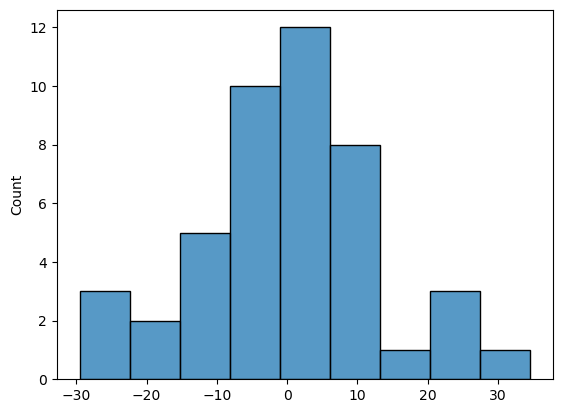

In [46]:
sns.histplot(residuals)

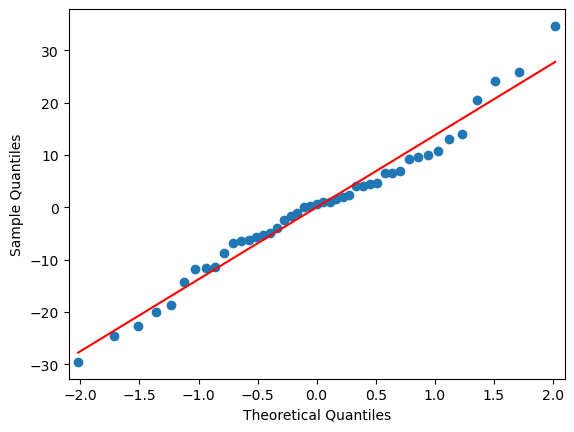

In [47]:
sm.qqplot(residuals, line="r")
plt.show()

In [48]:
scipy.stats.shapiro(residuals) 

ShapiroResult(statistic=0.9825432300567627, pvalue=0.7234017848968506)

#### Homoscedasticity

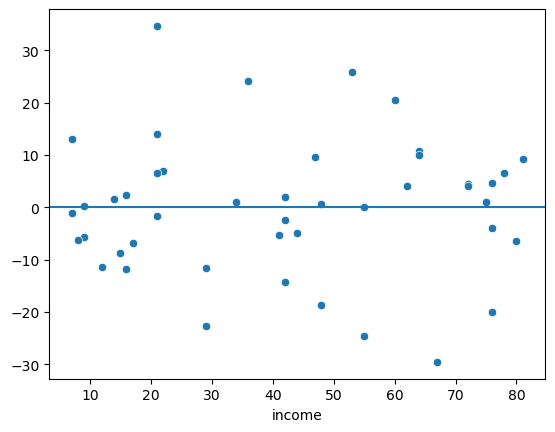

In [49]:
ax = sns.scatterplot(x=df['income'], y=residuals)
ax.axhline(0) #horizontal line at 0

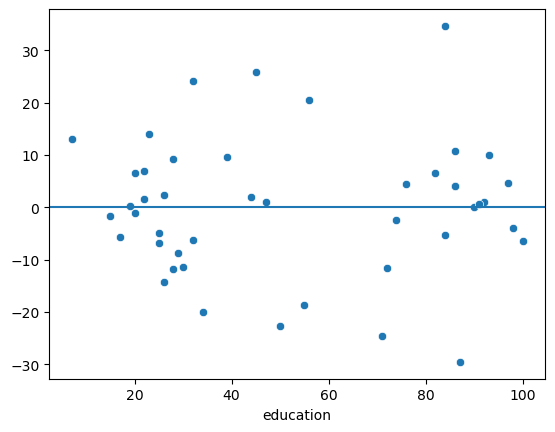

In [50]:
ax = sns.scatterplot(x=df['education'], y=residuals)
ax.axhline(0) #horizontal line at 0

In [51]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p,f_p)

0.750054380642975 0.7632527707017892


> Normality and homoscedasticity assumptions are satisfied, but we saw earlier that multicollinearity was not (significant correlation between income and education).

In [52]:
stat, p = scipy.stats.pearsonr(df['income'], df['education'])
p

1.83994641852091e-08

### Predictions
So if we want to predict the 'prestige' value for a job with an 'income' value of 50 and an 'education' value of 70, we can perform the following:

In [53]:
b0 = results.params['const']
b1 = results.params['income']
b2 = results.params['education']

known_income = 50
known_education = 70

predicted_prestige = b0 + b1*known_income + b2*known_education
predicted_prestige

62.08035181243301

## Logistic Regression

If our dependent variable is categorical (not numerical), then a linear regression model will likely not fit our data well. Logistic regression models will be a better fit. Let's just focus on the case where our dependent variable is a binary categorical variable (although logistic regression can also be applied to the multi-class classification).

Recall that our occupation dataset has a categorical variable referring to the type of occupation.
> Note: logistic regression does not require the normality or homoscedasticity assumptions, but still requires: no multicollinearity, independence of observations, and a linear relationship between the logit and the indep. variables.

In [54]:
df['type'].value_counts()

bc      21
prof    18
wc       6
Name: type, dtype: int64

Let's simplify our dataset to only include professional and blue-collar occupations, and then code 'prof' to be 1 and 'bc' to be 0. 

In [55]:
log_reg_df = df[(df['type']!='wc')] #remove the white collar jobs

# replace 'prof' and 'bc' with 1 and 0, respectively
log_reg_df.loc[log_reg_df['type'] == 'prof', 'type'] = 1
log_reg_df.loc[log_reg_df['type'] == 'bc', 'type'] = 0

log_reg_df['type'].value_counts()

0    21
1    18
Name: type, dtype: int64

We are now ready to perform logistic regression. Our dependent variable is 'type' and let's just use two independent variables 'income' and 'prestige' (and we'll include a constant in our model).

In [56]:
y = log_reg_df['type']
X = log_reg_df[['income', 'prestige']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y.astype(float),X.astype(float)) # (need to send in as floats)

results = model.fit() #fit the model (MLE)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.139965
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                   39
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.7972
Time:                        15:07:10   Log-Likelihood:                -5.4586
converged:                       True   LL-Null:                       -26.917
Covariance Type:            nonrobust   LLR p-value:                 4.793e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5321      3.210     -2.346      0.019     -13.824      -1.240
income        -0.0937      0.

So if we wanted to predict occupation type ('prof' or 'bc') from income and prestige, we can use the following formula to get the probability of the occupation being 'prof' (remember we coded 'prof' to be 1).

$$
p = \dfrac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}}
$$

$$
p_{prof} = \dfrac{1}{1+e^{-(b_0+b_1\times (income)+b_2\times (prestige))}}
$$

For job with an 'income' of 50 and a 'prestige' of 70, we can calculate the probability of that job's type is professional as follows:

In [57]:
import numpy as np #for euler's number

b0 = results.params['const']
b1 = results.params['income']
b2 = results.params['prestige']

known_income = 50
known_prestige = 70

exponent = -(b0+b1*known_income+b2*known_prestige)
prob_prof = 1/(1+np.exp(exponent))
prob_prof

0.9352680653054474